In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as plt
%matplotlib inline


In [ ]:
# exploratory data analysis

In [3]:
# read data
fish = pd.read_csv("/home/maria.carolina/Documents/aula_git/python_maior_que_r/Fish.csv")

In [4]:
# Check tables
fish.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# Statistical parameters
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
# type of data
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


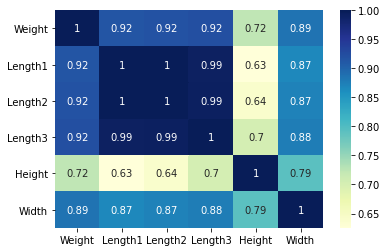

In [10]:
# 1. Correlation and plots

corr_all = fish.corr()
sns.heatmap(corr_all, annot=True, cmap='YlGnBu');




/home/maria.carolina/anaconda3/envs/env_1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

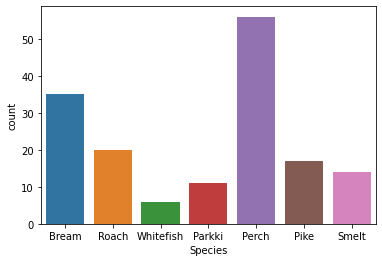

In [13]:
# Exploring species

# checking fish species
sns.countplot(fish['Species'])

In [15]:
# check species counts

fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Weight', ylabel='Length1'>

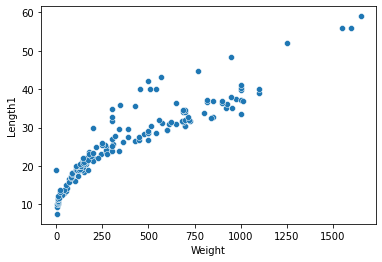

In [16]:
sns.scatterplot(data=fish, x="Weight", y="Length1")

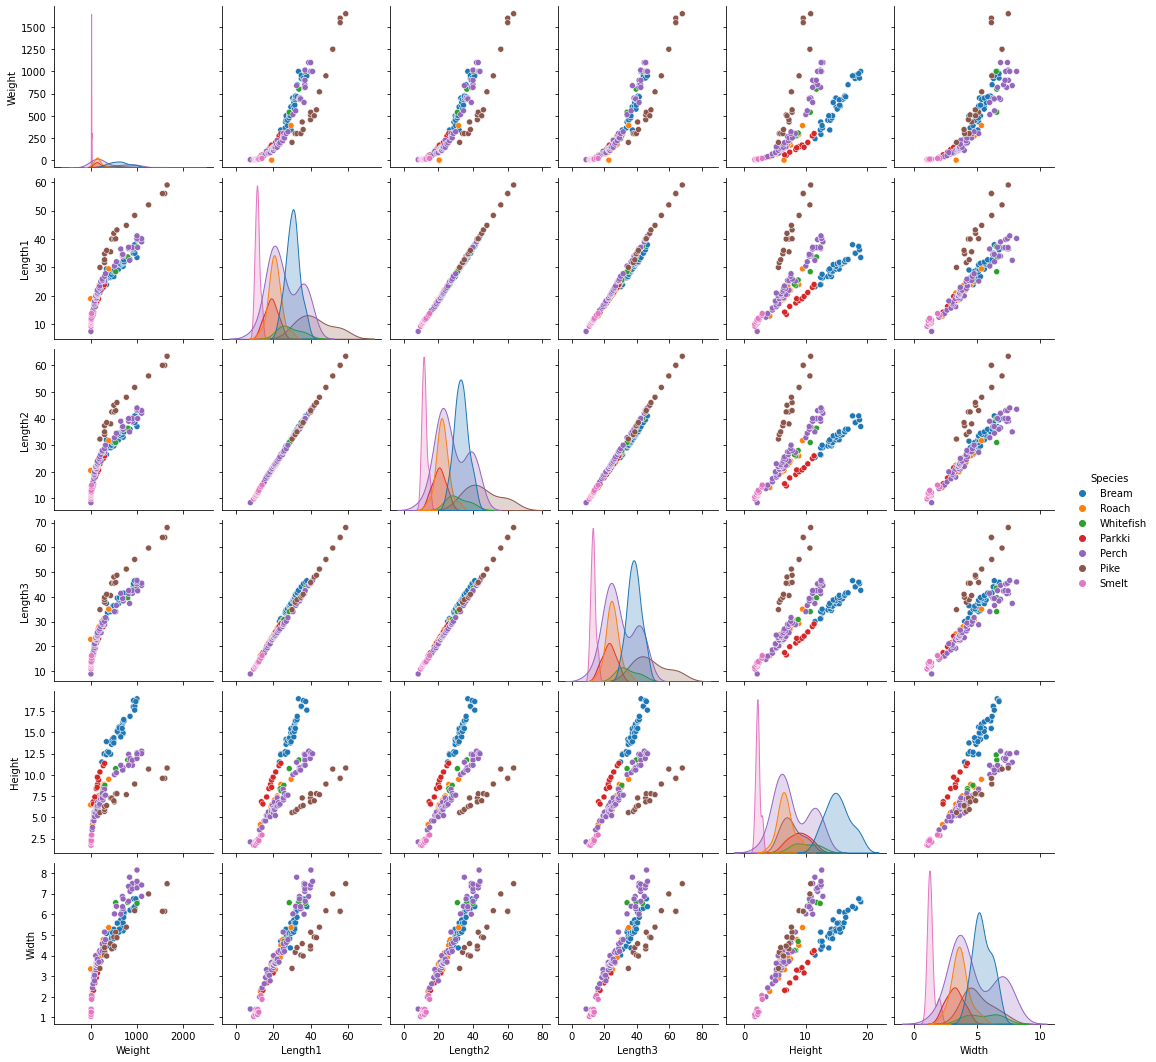

In [17]:
# general view and check outlier

sns.pairplot(fish, kind='scatter', hue='Species');

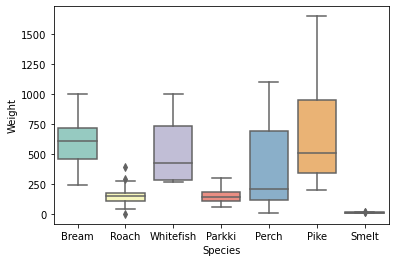

In [18]:
# check weigth by species
ax = sns.boxplot(x="Species", y="Weight", data=fish, palette="Set3")


In [20]:
# pre process to model

df1 = fish.copy()
df1.drop(['Species'], axis=1,inplace= True)

In [21]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [22]:
y_pred = clf.fit_predict(df1)
y_pred

array([ 1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [23]:
X_scores = clf.negative_outlier_factor_


In [25]:
threshold_value = np.sort(X_scores)[4]
threshold_value
# clean
Outlier_df= fish[X_scores < threshold_value]
indexs=Outlier_df.index
Outlier_df


,Species,Weight,Length1,Length2,Length3,Height,Width
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


In [27]:
# delete Outliers
for i in indexs:
    fish.drop(i, axis = 0,inplace = True)



In [30]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

lbe.fit_transform(fish["Species"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5])

In [31]:
fish["Target"]=lbe.fit_transform(fish["Species"])

In [33]:
fish.drop(['Species'],axis=1,inplace=True)

In [35]:
y=fish['Target']
X=fish.drop('Target',axis=1)


In [36]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,0.220000,0.384804,0.392610,0.457883,0.568334,0.418978
1,0.263636,0.404412,0.413395,0.483801,0.624055,0.459235
2,0.309091,0.401961,0.418014,0.481641,0.618123,0.514279
3,0.330000,0.460784,0.475751,0.533477,0.638566,0.480365
4,0.390909,0.465686,0.475751,0.544276,0.621966,0.576004


In [37]:
# splitting the data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,  test_size=0.2, random_state=42)

In [38]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [39]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 124)


In [40]:
model1= DecisionTreeClassifier()
model1.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
prediction = model1.predict(X_test)

accuracy_score(y_test, prediction)



0.7446808510638298

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print (confusion_matrix(y_test, prediction))

[[12  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0 12  0  3  0  0]
 [ 0  0  5  3  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  1  0  0  0  0]]


In [ ]:
# the end